In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from IPython.core.display import display, HTML
from collections import Counter


In [140]:
from IPython.display import HTML

HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
 } else {
 $('div.input').show();
 $('div .jp-CodeCell .jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code show/hide"></form>''')

In [141]:
# upload datasets
dataset_coagulopathies= pd.read_csv('dataset_datathon_21_v2_74h.csv')
dataset_events_by_groups= pd.read_csv('events_by_groups.csv')
dataset_events_per_case= pd.read_csv('events_per_case.csv')

# General description of event log

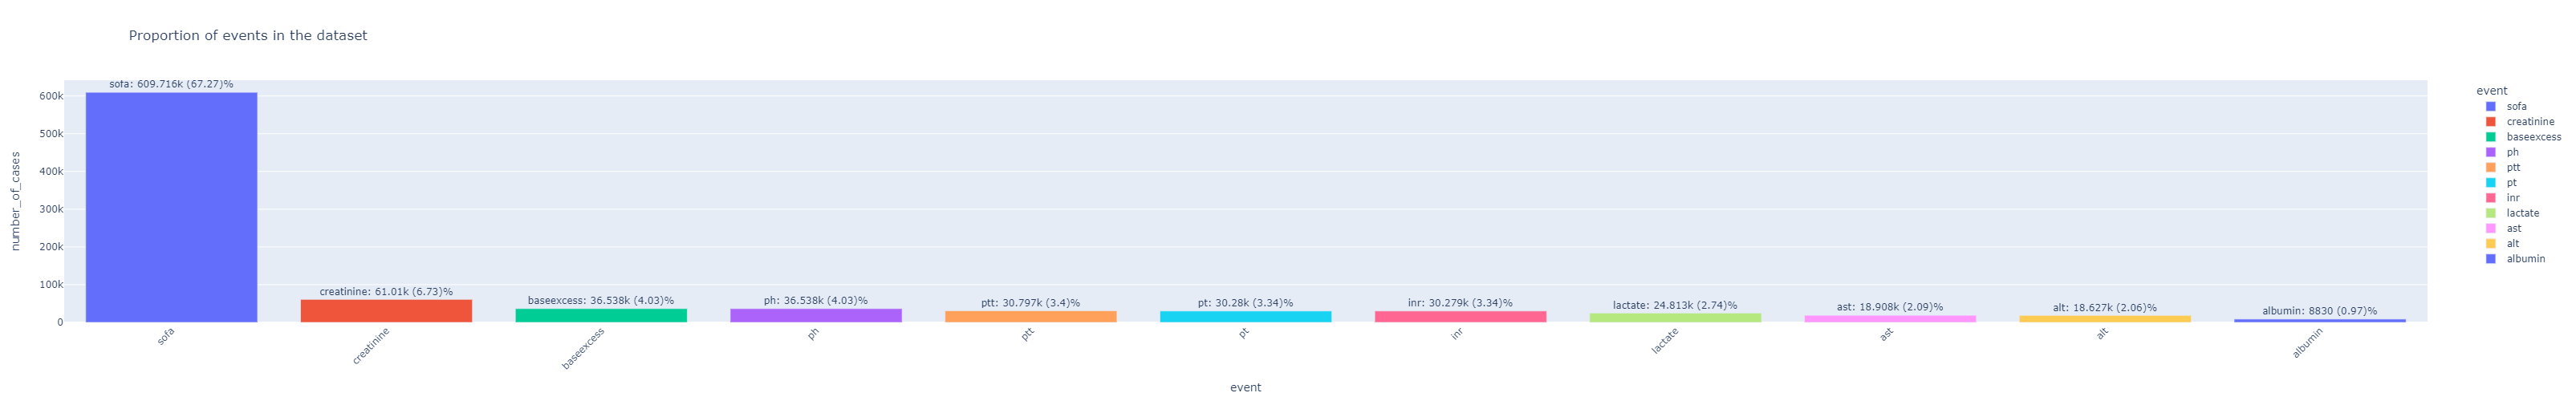

In [142]:
fig = px.bar(dataset_events_by_groups, x="event", y="number_of_cases", color="event", text='percent',height=500, title="Proportion of events in the dataset",) # width=1700, height=800
fig.update_xaxes(tickangle=-45,categoryorder='array')
fig.update_traces(texttemplate= "%{x}: %{y} (%{text})%", textposition='outside') 
fig.show() 

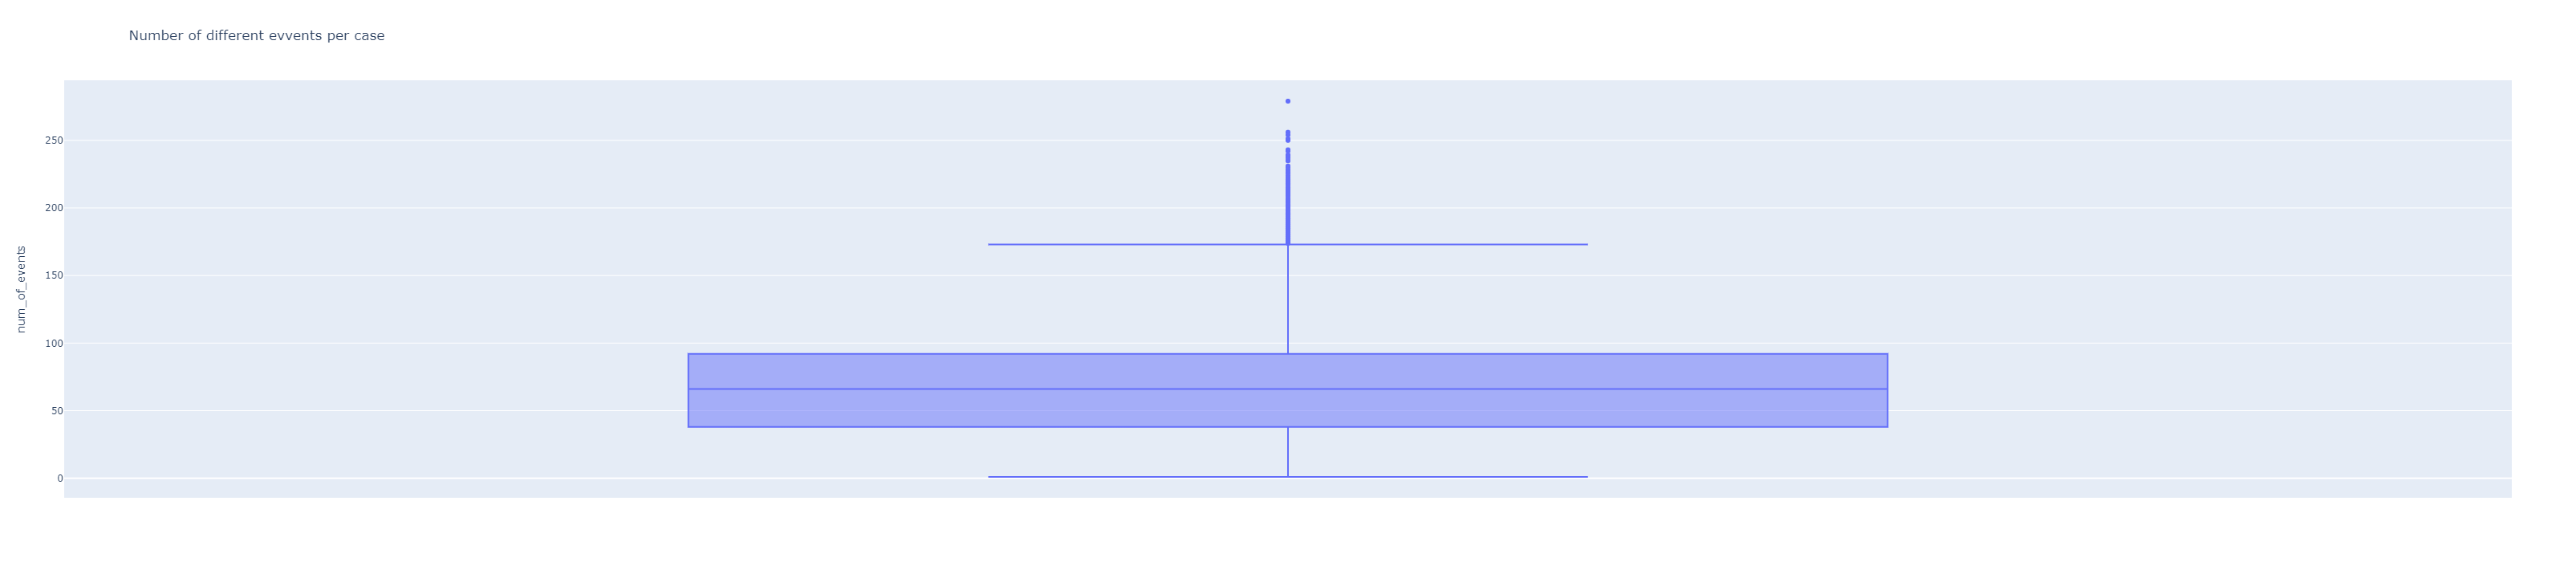

In [143]:
fig = px.box(dataset_events_per_case, y="num_of_events", title="Number of different evvents per case",height=700)
fig.show()

# Exploratory data analysis

<p style="font-family: Arial; font-size:1em;"><b>How to interpret the Box Plots:</b> <br>
    <br>Box plots graphically depict the five-number summary of minimum, first quartile, median, third quartile, and maximum. Tip - Start by comparing the medians
    <ul>
        <li>Y-Axis = The feature and the feature’s scale</li>
        <li>Line inside the box = median</li>
        <li>The box = stretches from the first to third quartile</li>
        <li>Dots = Outliers</li>
    </ul>
    </p>
    
<p style="font-family: Arial; font-size:1em;"><b>How to interpret the Histograms:</b> <br>
        <br>A histogram is the most commonly used graph to show frequency distributions.
        <ul>
        <li>Y-Axis = The number of patients</li>
        <li>Remember the proportions differ</li>
    </ul>
    </p>
<p style="font-family: Arial; font-size:1em;"><b>How to interpret the Density Plot:</b> <br>    
    <br>A Density Plot is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise.  </p>

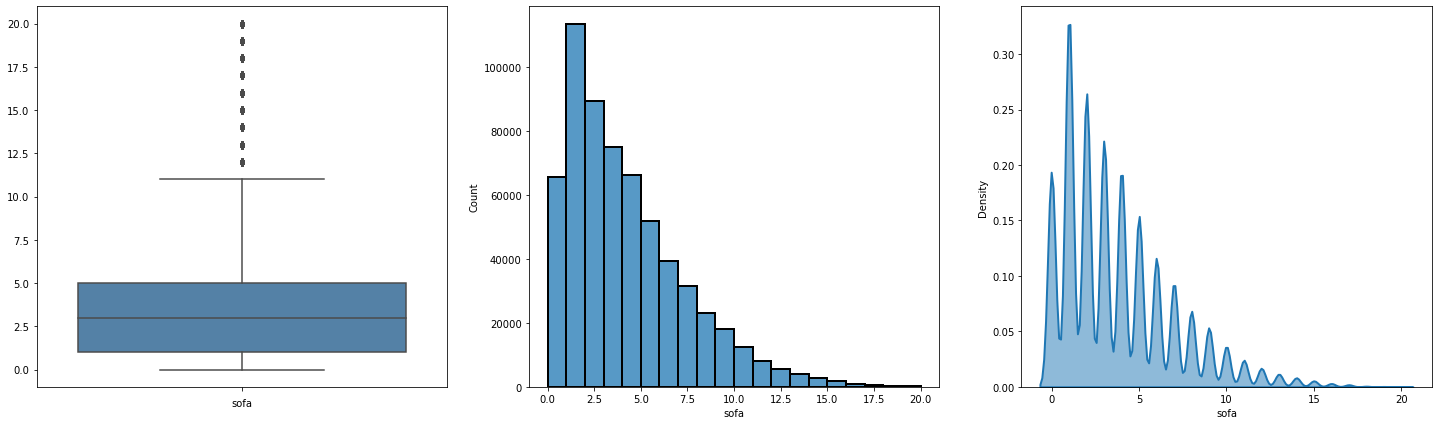

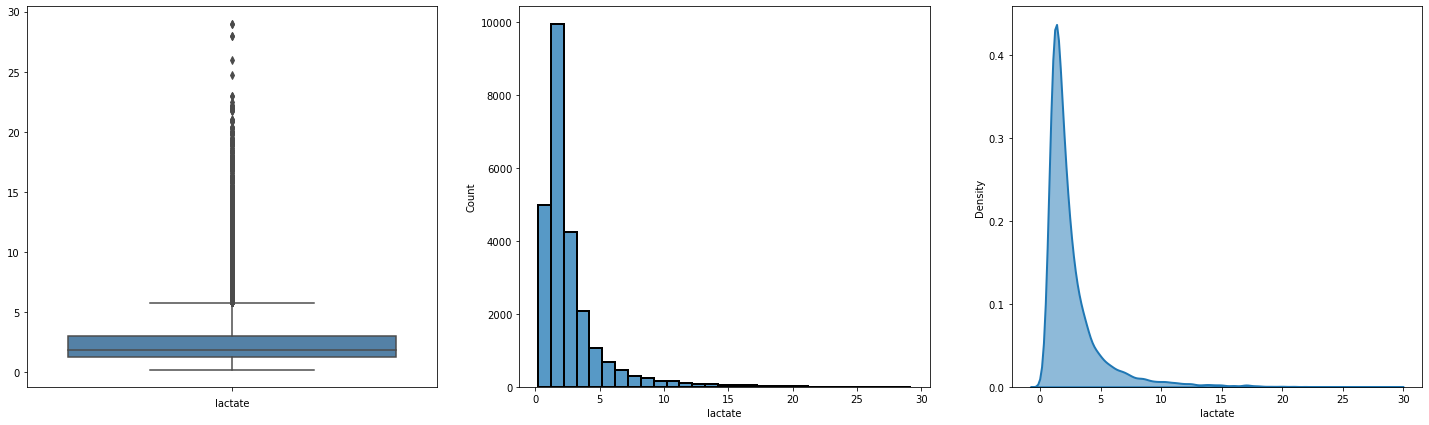

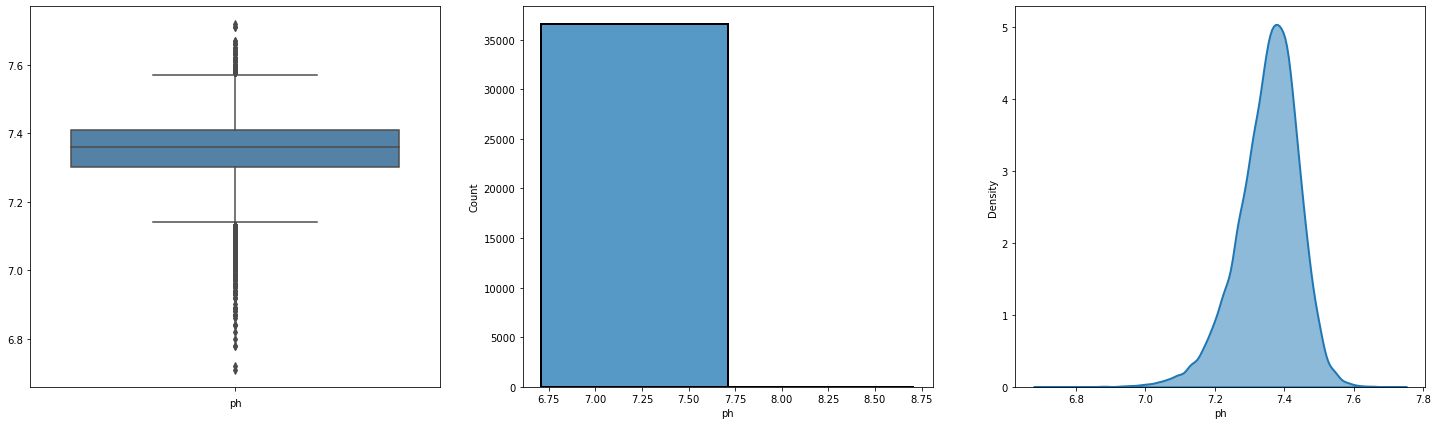

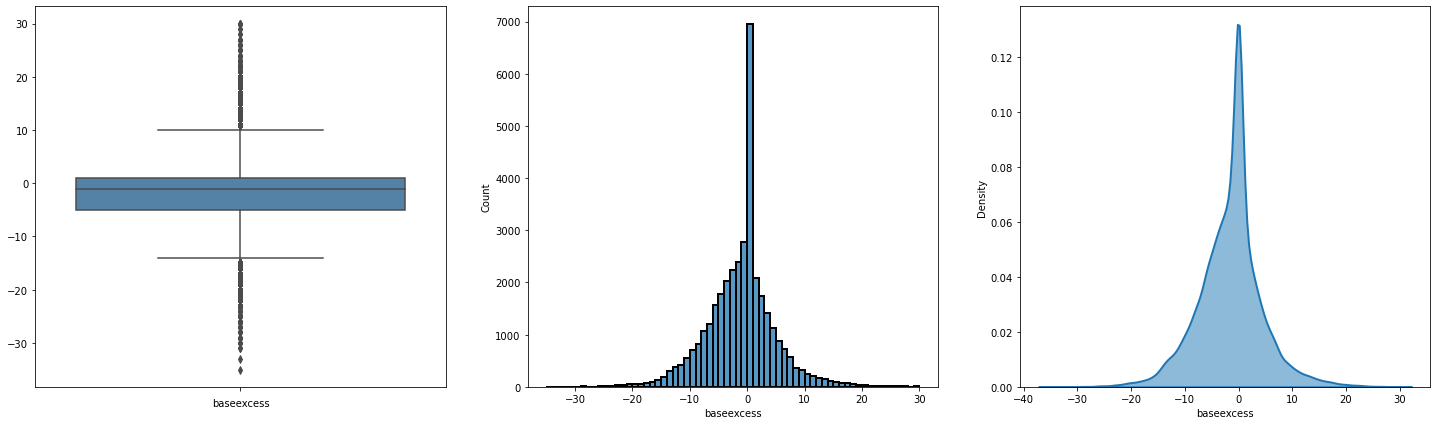

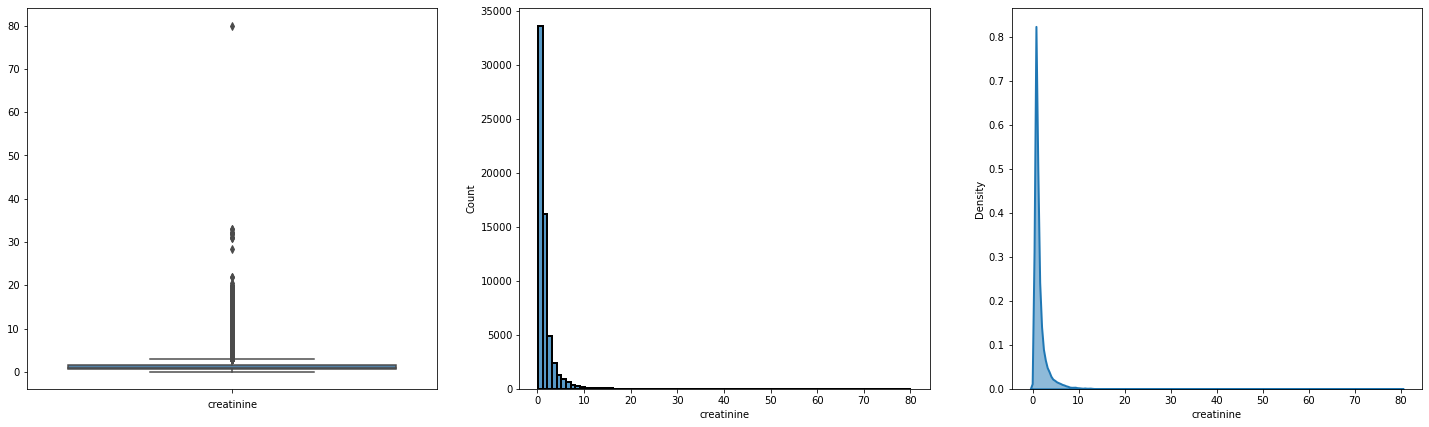

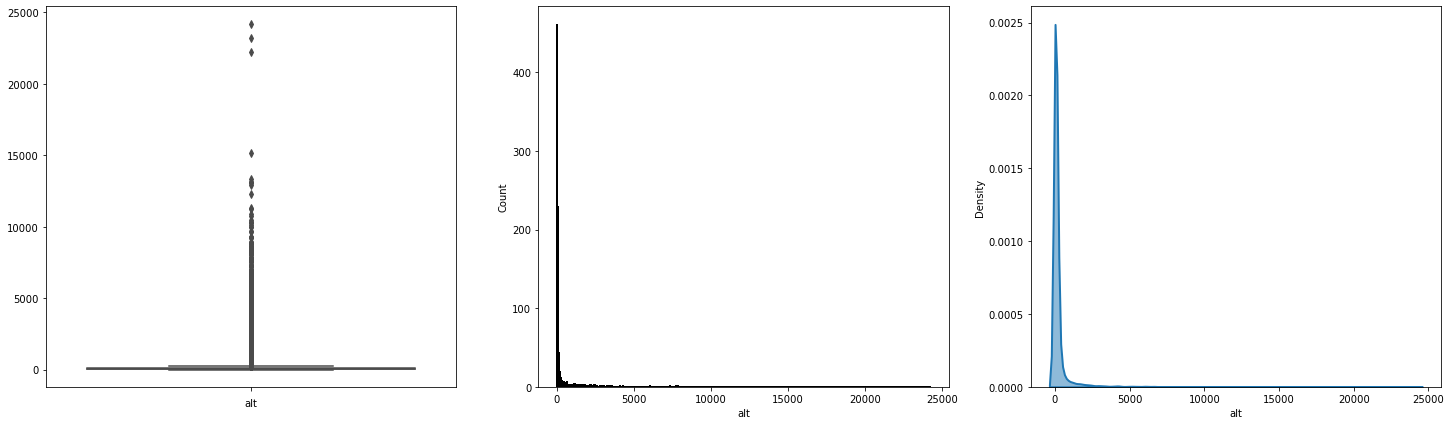

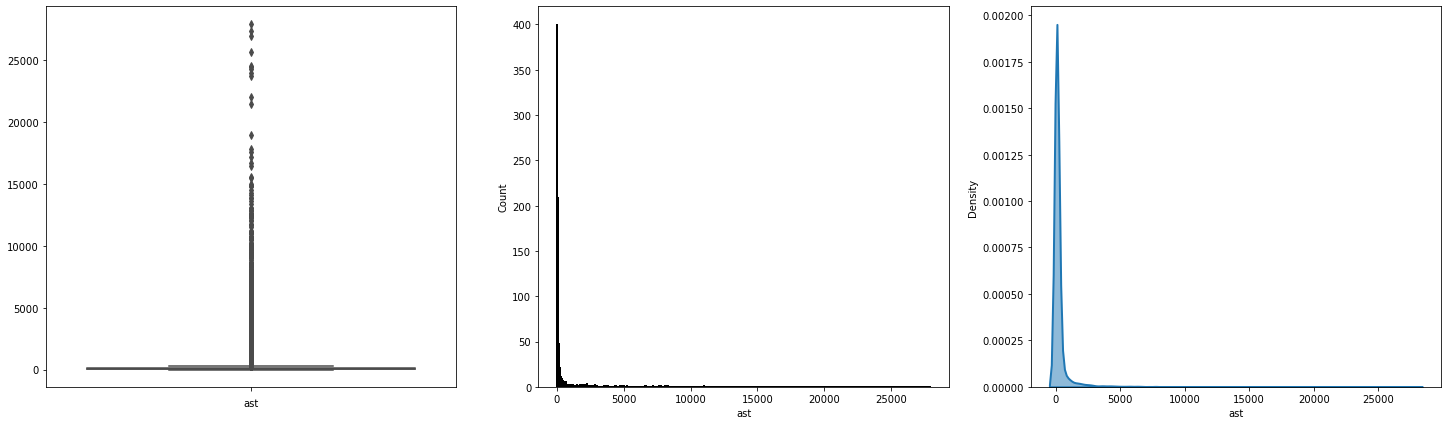

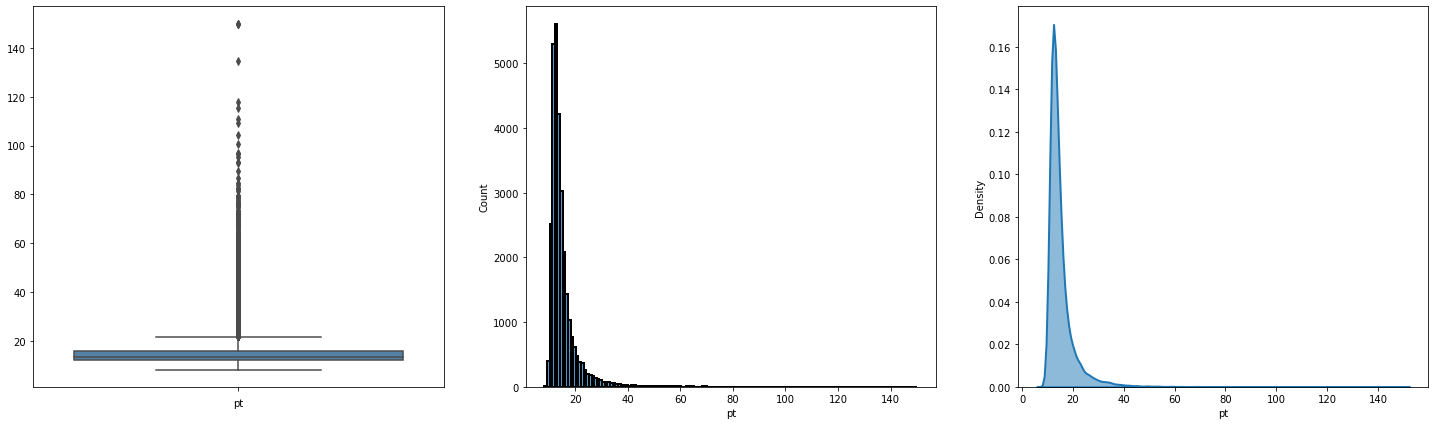

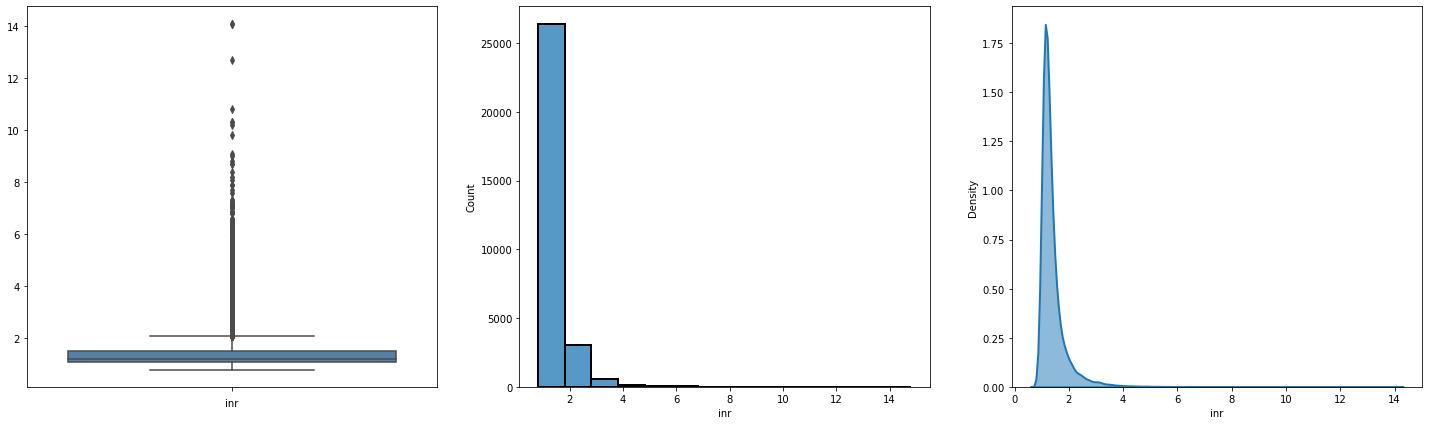

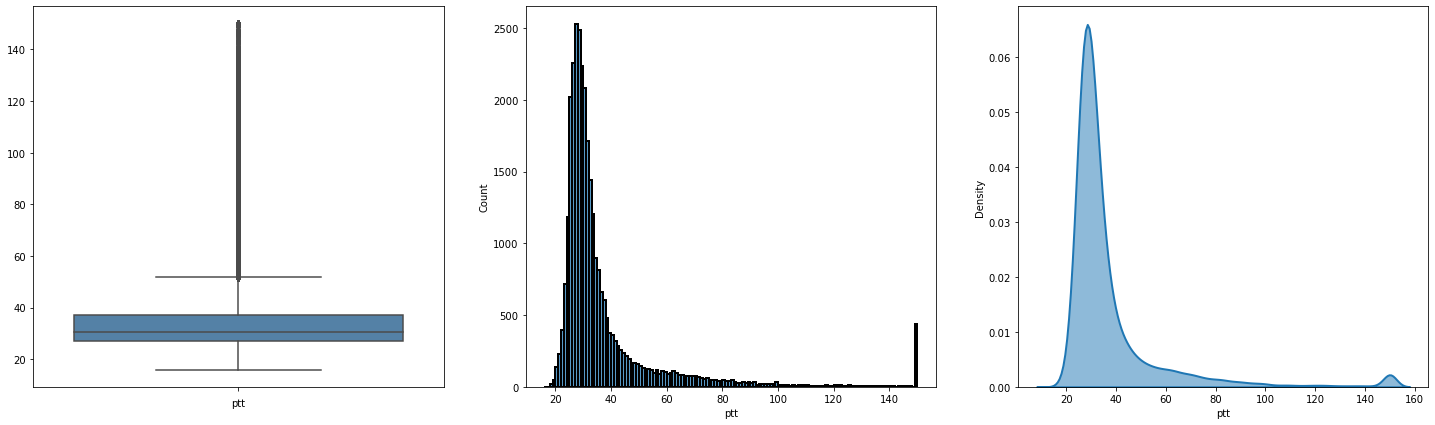

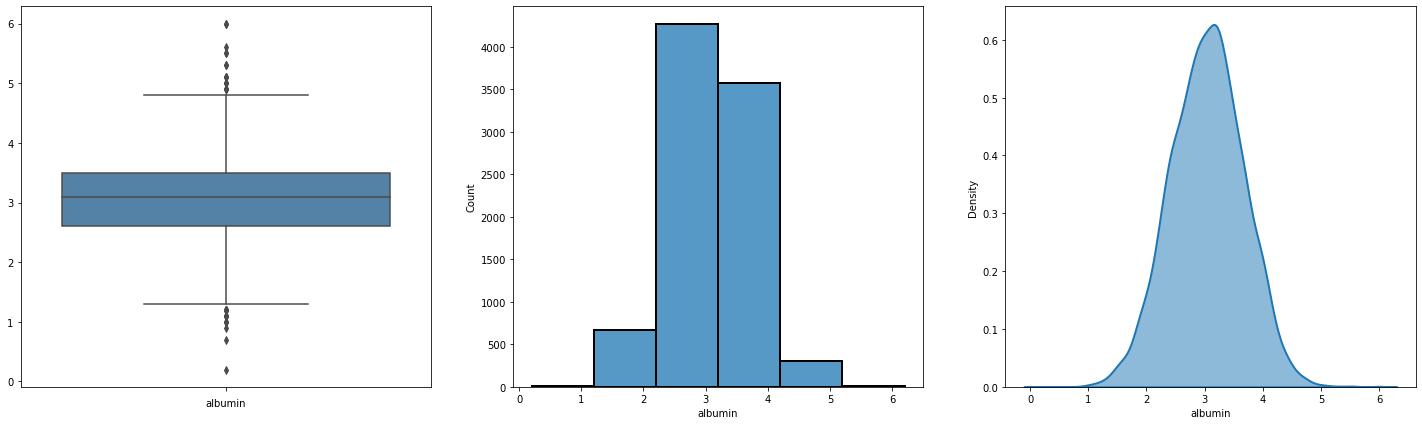

In [144]:
pal = ["steelblue","lightcoral"]
for event in events:  
    display(HTML('<h1><p style="color:red">'+event+'</p></h1>'))
    fig, ax = plt.subplots(1,3, figsize=(25,7))
    sns.boxplot( y=dataset_coagulopathies.loc[(dataset_coagulopathies['event'] == event)]['event_value'].values,  palette=pal, ax=ax[0])       
    sns.histplot(x=dataset_coagulopathies.loc[(dataset_coagulopathies['event'] == event)]['event_value'].values, palette=pal, linewidth=2, ax=ax[1], binwidth=1)
    sns.kdeplot( x=dataset_coagulopathies.loc[(dataset_coagulopathies['event'] == event)]['event_value'].values,  fill=True, common_norm=False, palette=pal, alpha=.5, linewidth=2,) 
    for i in range(3):
        ax[i].set_xlabel(event)  
    plt.show()

# Outliers

In [145]:
# functions for ubtaining outliers
def find_outliers(df, col_name):   
    percentile25 = df[col_name].quantile(0.25)
    percentile75 = df[col_name].quantile(0.75)
    
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 3 * iqr
    lower_limit = percentile25 - 3* iqr
    
    anomalies_upper = df[col_name][df[col_name] > upper_limit]
    anomalies_lower = df[col_name][df[col_name] < lower_limit]
    anomalies = list(pd.concat([anomalies_upper, anomalies_lower]))
    return anomalies, upper_limit, lower_limit
    

## List of borders and numbers of outliers per event

In [146]:
number_of_cases=[]
len_of_anomalies=[]
upper_limit_value=[]
lower_limit_value=[]
for event in events[1:]:
    df_per_fetaure=pd.DataFrame({event: dataset_coagulopathies['event_value'][dataset_coagulopathies['event']==event]})
    anomalies, upper_limit, lower_limit=find_outliers(df_per_fetaure,event)
    number_of_cases.append(df_per_fetaure.shape[0])
    len_of_anomalies.append(len(anomalies))
    upper_limit_value.append(round(upper_limit,2))
    lower_limit_value.append(round(lower_limit,2))
pd.DataFrame({event:events[1:], 'number_of_cases':number_of_cases,'number_of_outliers':len_of_anomalies, 'upper_limit_value': upper_limit_value, 'lower_limit_value': lower_limit_value })

,albumin,number_of_cases,number_of_outliers,upper_limit_value,lower_limit_value
0,lactate,24813,953,8.40,-4.20
1,ph,36538,46,7.74,6.97
2,baseexcess,36538,195,19.00,-23.00
3,creatinine,61010,3527,4.30,-2.00
4,alt,18627,2005,349.00,-232.00
5,ast,18908,1976,399.00,-259.00
6,pt,30280,1162,27.60,0.30
7,inr,30279,1003,2.70,-0.10
8,ptt,30797,2170,66.40,-2.20
9,albumin,8830,0,6.20,-0.10


## Features without outliers

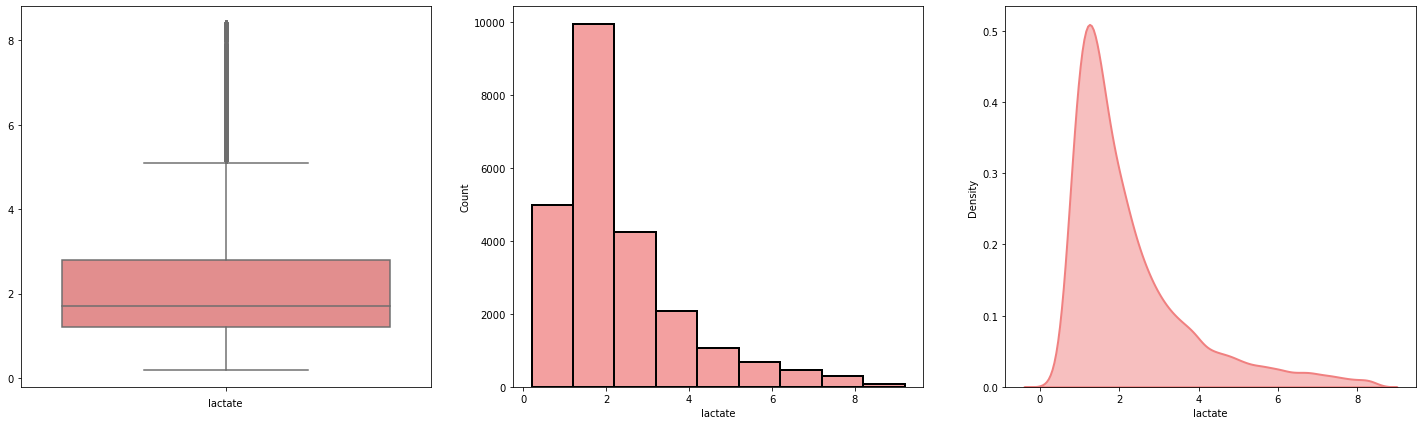

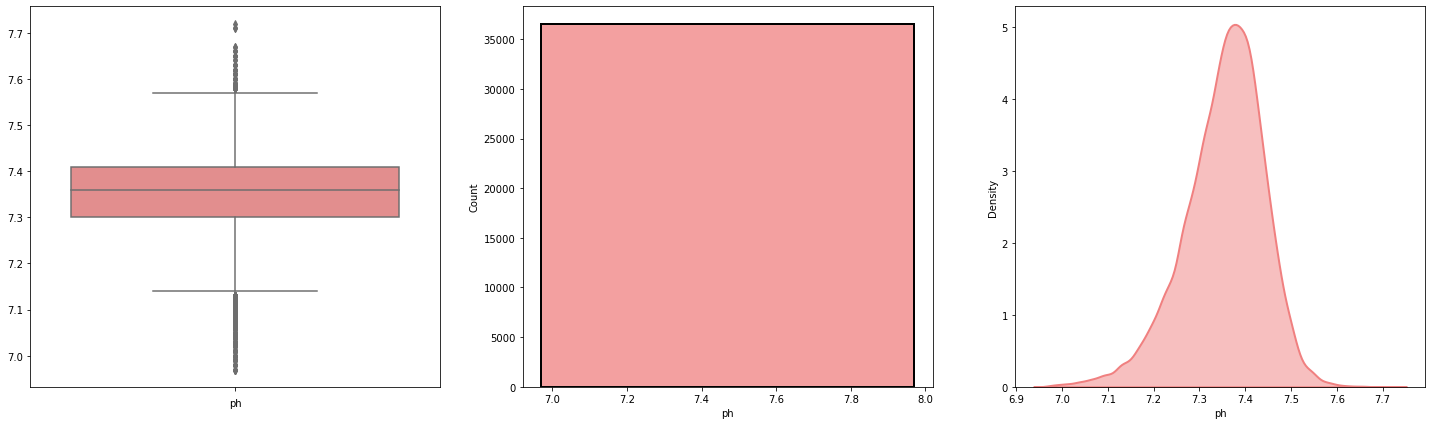

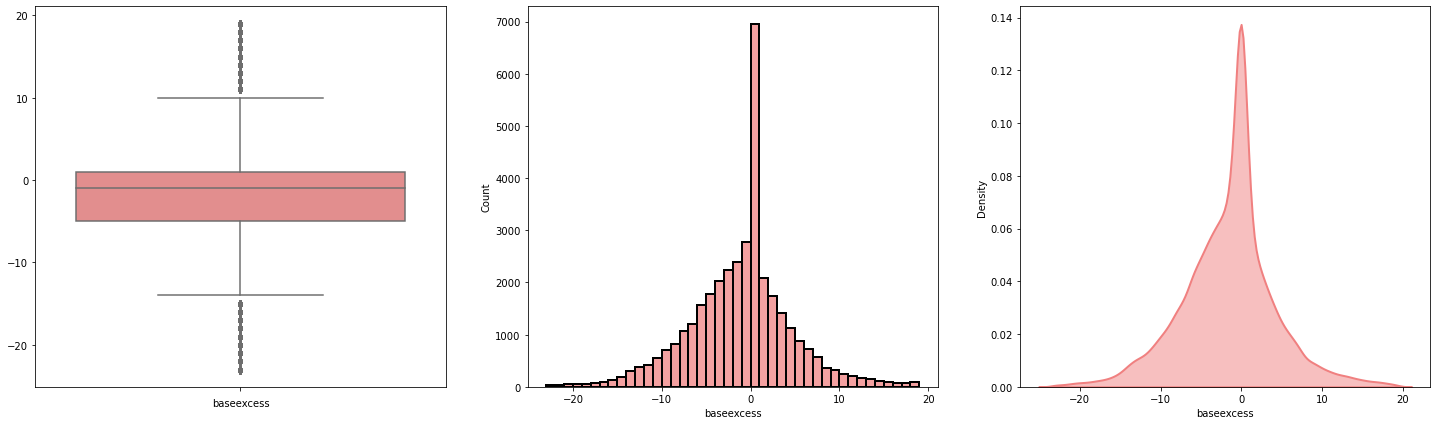

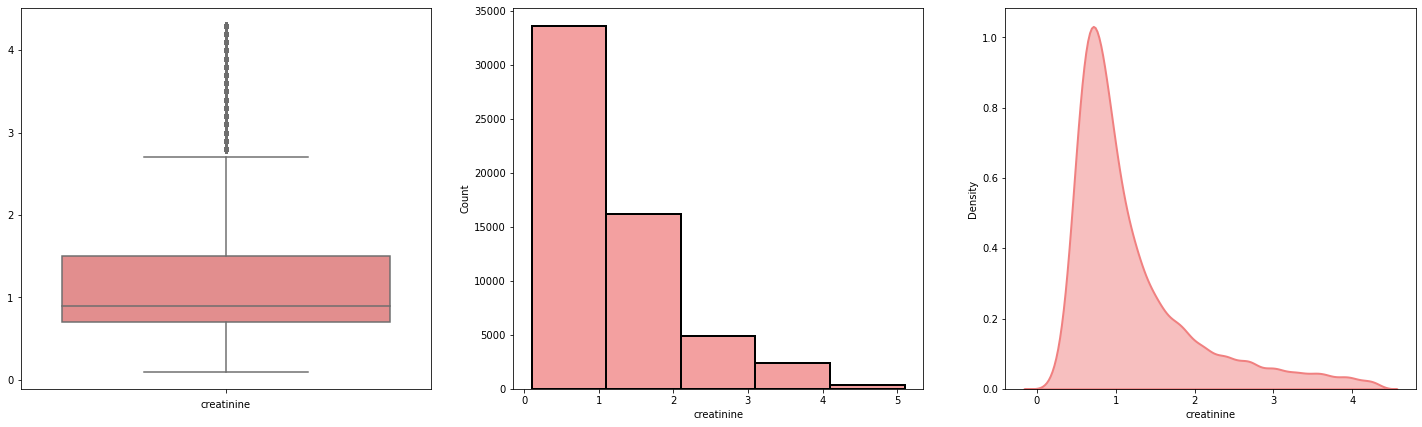

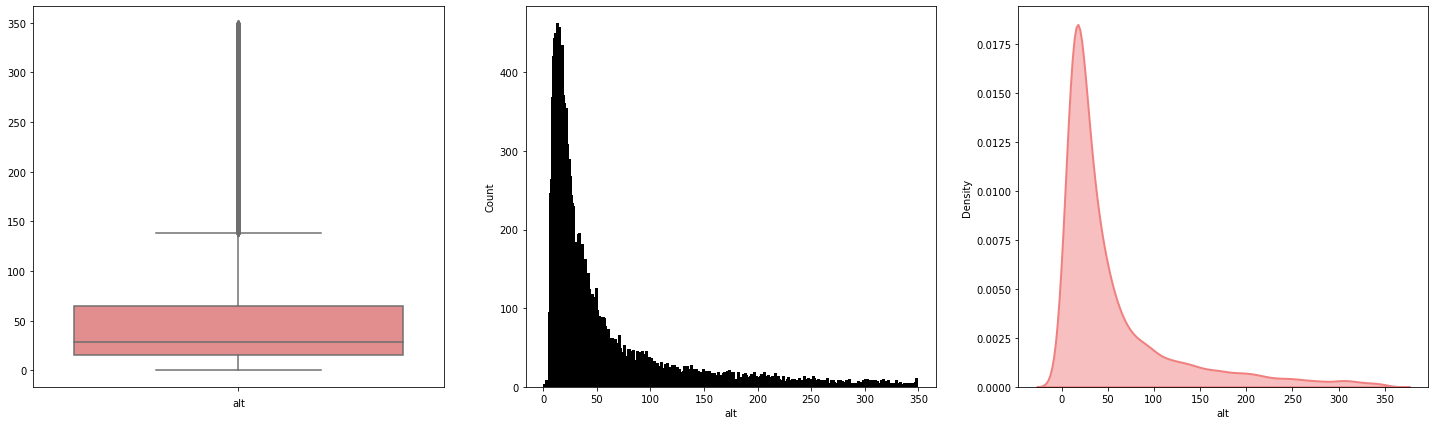

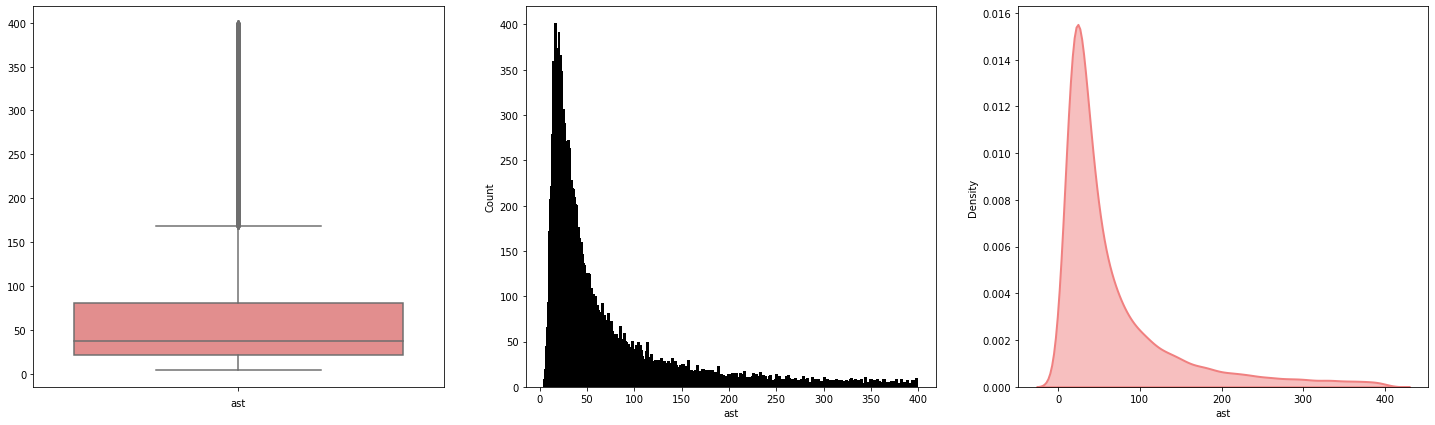

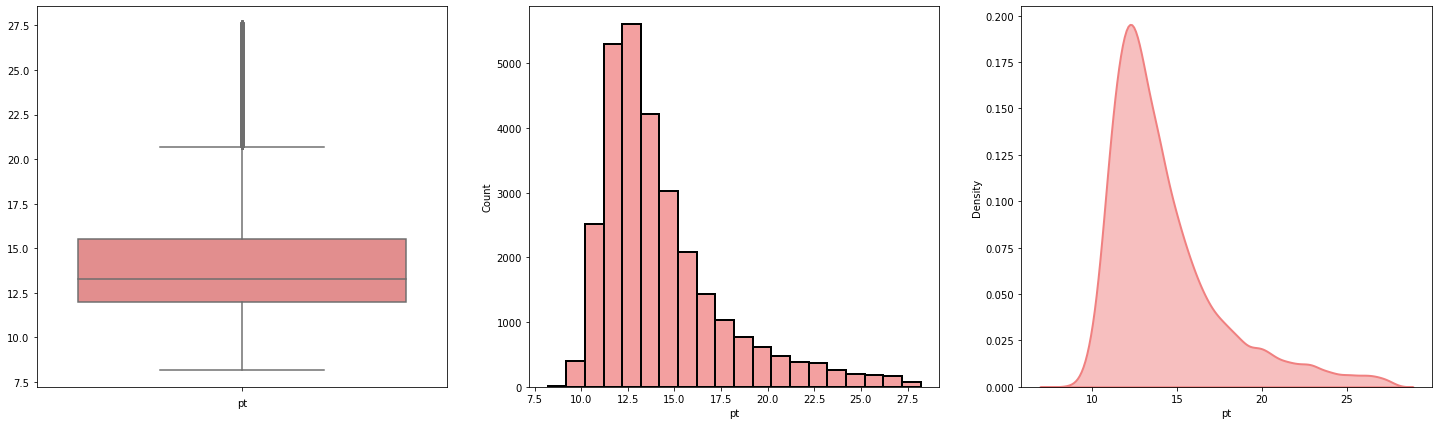

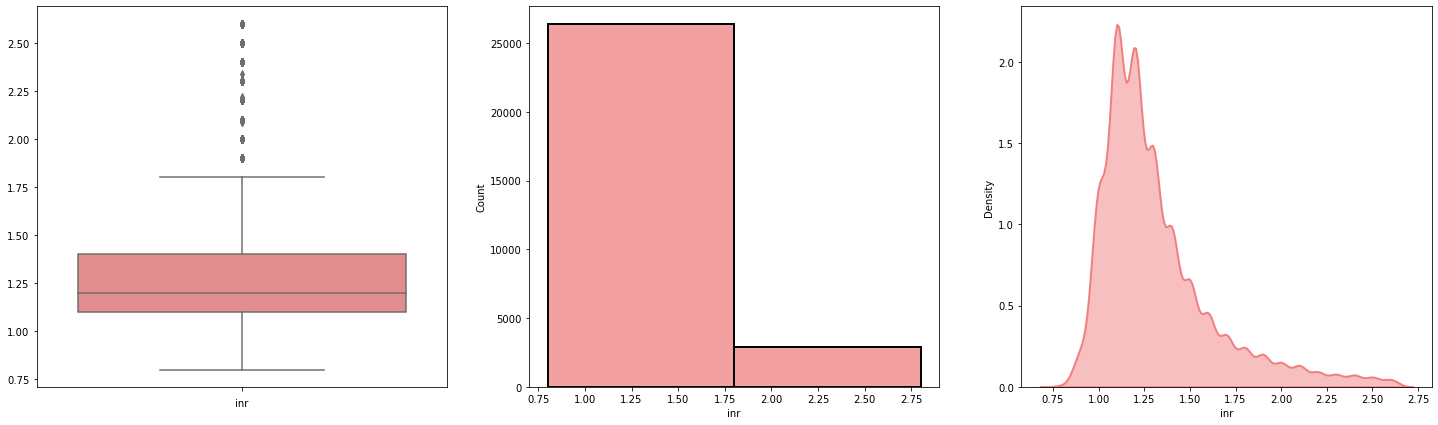

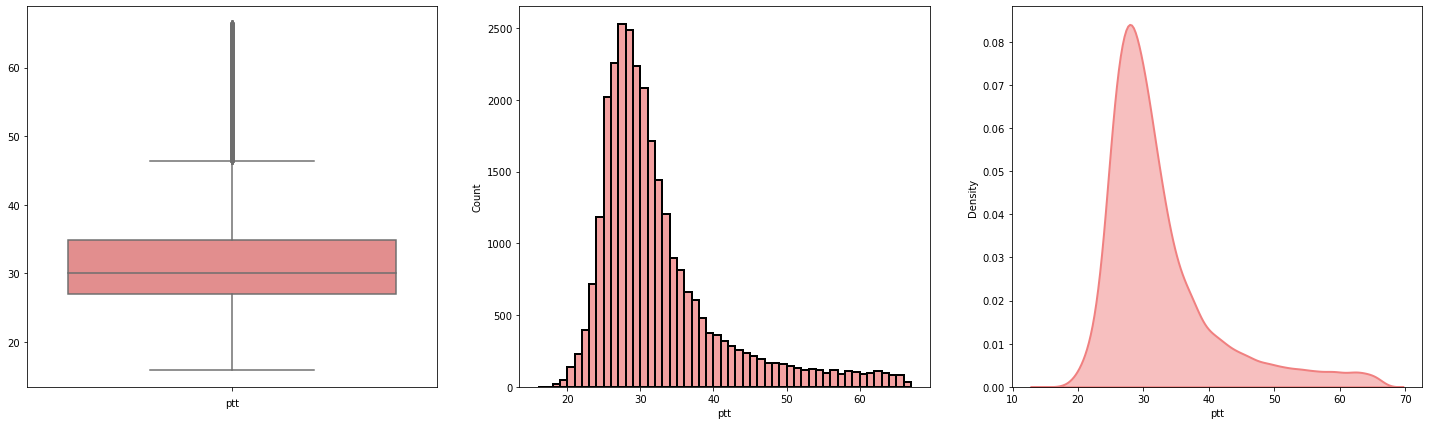

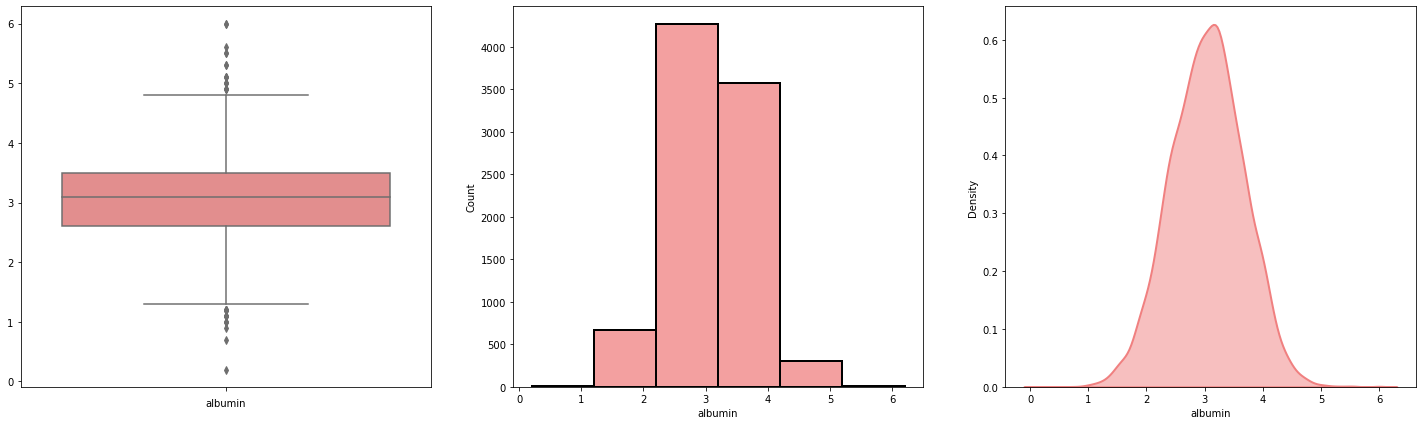

In [147]:
pal = ["lightcoral"]

for event in events[1:]:
    df_per_fetaure=pd.DataFrame({event: dataset_coagulopathies['event_value'][dataset_coagulopathies['event']==event]})
    anomalies, upper_limit, lower_limit=find_outliers(df_per_fetaure,event)
    df_per_fetaure_woutliers = df_per_fetaure[~df_per_fetaure[event].isin(anomalies)]
    display(HTML('<h1><p style="color:blue">'+event+'</p></h1>'))
  
    fig, ax = plt.subplots(1,3, figsize=(25,7))
    sns.boxplot( y=df_per_fetaure_woutliers[event].values,  palette=pal, ax=ax[0]) 
    sns.histplot(x=df_per_fetaure_woutliers[event].values, color=pal, linewidth=2, ax=ax[1], binwidth=1)
    sns.kdeplot( x=df_per_fetaure_woutliers[event].values,  fill=True, common_norm=False, color=pal, alpha=.5, linewidth=2,)
    for i in range(3):
        ax[i].set_xlabel(event)  
    plt.show()
    